In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
import joblib





In [125]:
data = pd.read_csv('C:\\Users\\achin\\Downloads\\XTern 2024 Artificial Intelegence Data Set - Xtern_TrainData.csv')

In [126]:
print(data.head())

     Year                    Major                University  Time  \
0  Year 2                  Physics  Indiana State University    12   
1  Year 3                Chemistry     Ball State University    14   
2  Year 3                Chemistry         Butler University    12   
3  Year 2                  Biology  Indiana State University    11   
4  Year 3  Business Administration         Butler University    12   

                                               Order  
0                               Fried Catfish Basket  
1                                    Sugar Cream Pie  
2                                 Indiana Pork Chili  
3                               Fried Catfish Basket  
4  Indiana Corn on the Cob (brushed with garlic b...  


In [127]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        5000 non-null   object
 1   Major       5000 non-null   object
 2   University  5000 non-null   object
 3   Time        5000 non-null   int64 
 4   Order       5000 non-null   object
dtypes: int64(1), object(4)
memory usage: 195.4+ KB
None


In [128]:
print(data.describe())

              Time
count  5000.000000
mean     12.528200
std       1.357193
min       8.000000
25%      12.000000
50%      13.000000
75%      13.000000
max      17.000000


In [129]:
data.dropna(inplace=True)

In [130]:
data.drop_duplicates(inplace=True)

<Axes: >

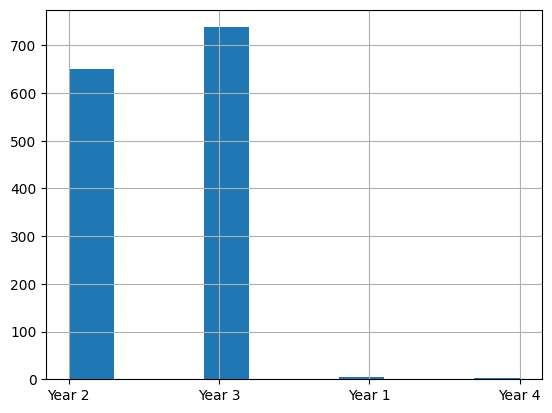

In [131]:
data['Year'].hist()

Text(0, 0.5, 'Quantity')

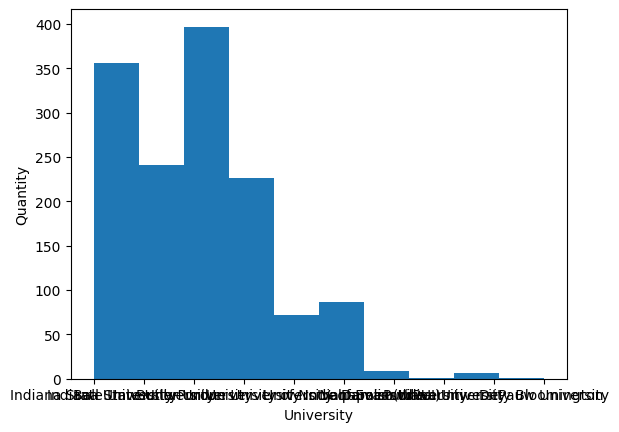

In [132]:
plt.hist(data['University'])
plt.xlabel('University')
plt.ylabel('Quantity')

<Axes: ylabel='Major'>

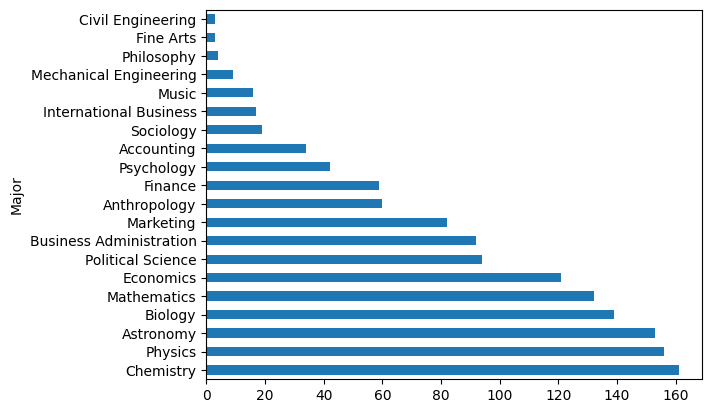

In [133]:
data['Major'].value_counts().plot(kind='barh')


In [134]:
data.tail()


,Year,Major,University,Time,Order
4959,Year 1,Business Administration,University of Notre Dame,15,Ultimate Grilled Cheese Sandwich (with bacon a...
4978,Year 2,Physics,Ball State University,10,Breaded Pork Tenderloin Sandwich
4981,Year 2,Biology,Butler University,14,Hoosier BBQ Pulled Pork Sandwich
4984,Year 2,Business Administration,Ball State University,11,Ultimate Grilled Cheese Sandwich (with bacon a...
4999,Year 2,Economics,University of Notre Dame,15,Breaded Pork Tenderloin Sandwich


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1396 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        1396 non-null   object
 1   Major       1396 non-null   object
 2   University  1396 non-null   object
 3   Time        1396 non-null   int64 
 4   Order       1396 non-null   object
dtypes: int64(1), object(4)
memory usage: 65.4+ KB


In [136]:
data.describe()

,Time
count,1396.000000
mean,12.520057
std,1.618539
min,8.000000
25%,11.000000
50%,13.000000
75%,14.000000
max,17.000000


Text(0, 0.5, 'Frequency')

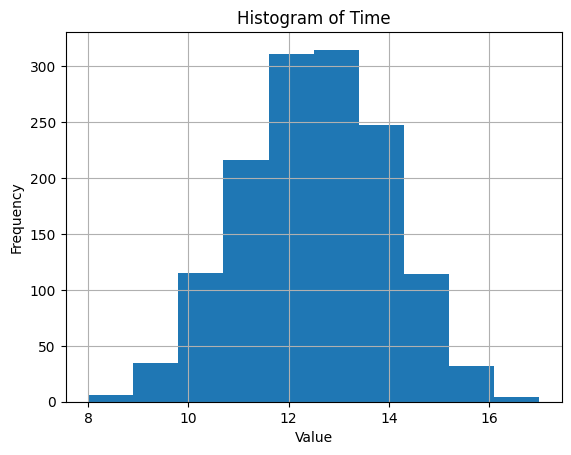

In [137]:
data['Time'].hist()
plt.title('Histogram of Time')
plt.xlabel('Value')
plt.ylabel('Frequency')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Fried Catfish Basket'),
  Text(0, 1, 'Sugar Cream Pie'),
  Text(0, 2, 'Indiana Pork Chili'),
  Text(0, 3, 'Indiana Corn on the Cob (brushed with garlic butter)'),
  Text(0, 4, 'Indiana Buffalo Chicken Tacos (3 tacos)'),
  Text(0, 5, 'Sweet Potato Fries'),
  Text(0, 6, 'Ultimate Grilled Cheese Sandwich (with bacon and tomato)'),
  Text(0, 7, 'Breaded Pork Tenderloin Sandwich'),
  Text(0, 8, 'Cornbread Hush Puppies'),
  Text(0, 9, 'Hoosier BBQ Pulled Pork Sandwich')])

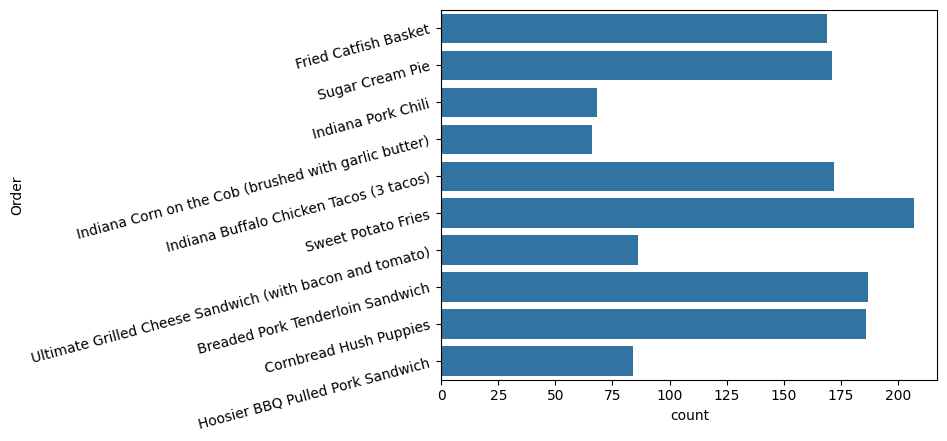

In [138]:
sns.countplot(data=data, y='Order')
plt.yticks(rotation=15)

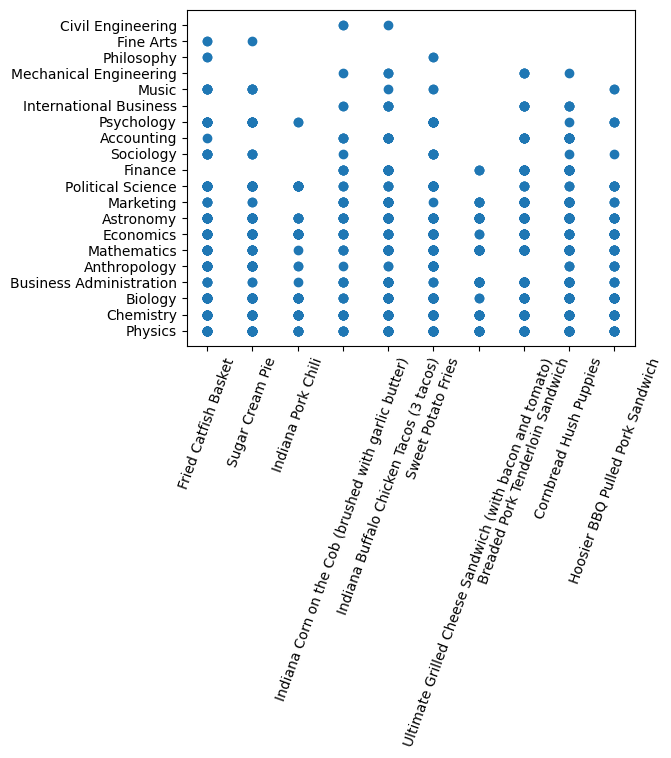

In [139]:
plt.scatter(data=data, x='Order', y='Major')
plt.xticks(rotation=70)
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.2)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Indiana State University'),
  Text(1, 0, 'Ball State University'),
  Text(2, 0, 'Butler University'),
  Text(3, 0, 'Indiana University-Purdue University Indianapolis (IUPUI)'),
  Text(4, 0, 'University of Notre Dame'),
  Text(5, 0, 'University of Evansville'),
  Text(6, 0, 'Valparaiso University'),
  Text(7, 0, 'Purdue University'),
  Text(8, 0, 'Indiana University Bloomington'),
  Text(9, 0, 'DePauw University')])

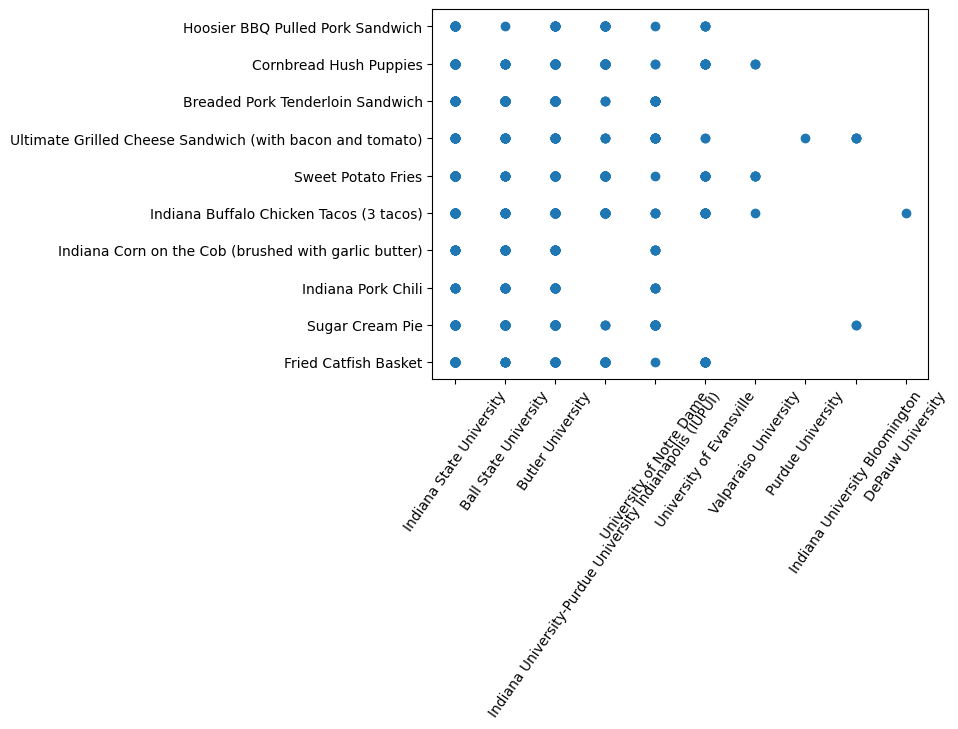

In [140]:
plt.scatter(data=data, x='University', y='Order')
plt.xticks(rotation=55)

(array([ 6.,  8., 10., 12., 14., 16., 18.]),
 [Text(6.0, 0, '6'),
  Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12'),
  Text(14.0, 0, '14'),
  Text(16.0, 0, '16'),
  Text(18.0, 0, '18')])

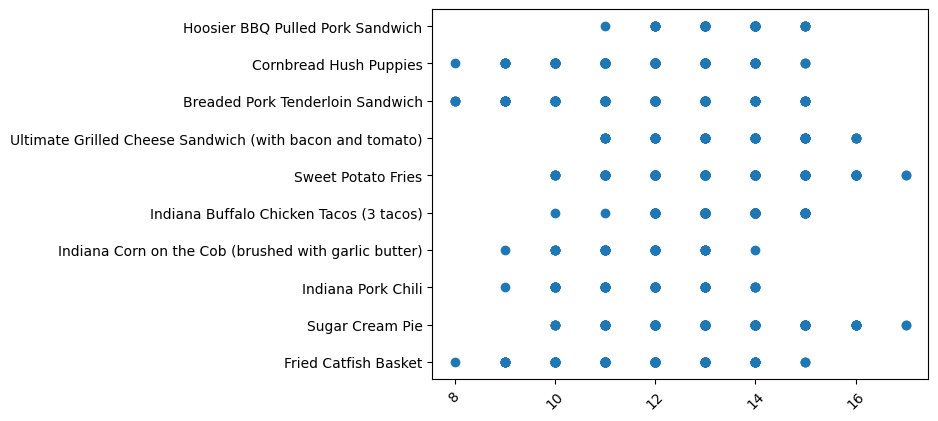

In [141]:
plt.scatter(data = data, x = 'Time', y= 'Order')
plt.xticks(rotation=45)

In [142]:
from scipy.stats import chi2_contingency

In [143]:
contingency_table = pd.crosstab(data['Major'], data['Order'])

In [144]:
chi2, p, dof, expected = chi2_contingency(contingency_table)

In [145]:
def cramers_v(x,y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k=confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1) ** 2)/(n-1)
    kcorr = k - k - ((k-1) ** 2)/ (n-1)
    return np.sqrt(phi2corr/ min((kcorr - 1), (rcorr - 1)))


In [146]:
majorCorrelation = cramers_v(data['Major'], data['Order'])
print(majorCorrelation)

nan


C:\Users\achin\AppData\Local\Temp\ipykernel_47004\3600055279.py:10: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(phi2corr/ min((kcorr - 1), (rcorr - 1)))


In [147]:
print(contingency_table)

Order                    Breaded Pork Tenderloin Sandwich  \
Major                                                       
Accounting                                              9   
Anthropology                                            0   
Astronomy                                              24   
Biology                                                10   
Business Administration                                24   
Chemistry                                              17   
Civil Engineering                                       0   
Economics                                              10   
Finance                                                17   
Fine Arts                                               0   
International Business                                  6   
Marketing                                              21   
Mathematics                                            21   
Mechanical Engineering                                  4   
Music                   

Looking at this data, we can see that we learn quite a bit about the order based on distributions and biases of the data. First, we remove and clean the data by removing na values and removing duplicates. We can see that there is some difference between the order when we consider school, however we need more correlation analysis to figure out if this is legitamate. The most common order is sweet potato fries, the least common order is Indiana Corn on the Cob. 

Ethical Concerns: Data Collection and Privacy, transparency is required, data minimization, data security, and informed consent is required. 
Data Biases: Stereotyping, Non discrimination
Business Outcomes: Accuracy is criucial. PRedictions need to be consistently correct, and something needs to be done to reduce incorrect predictions. 
Marketing: marketing strategies need to be ethical and transparent. Avoid manipulative tactics or exploiting data for the benefit of businesses. 
Technical Implications: The AI model has to be fair, we need to employ fairness aware machine learning. 
Data HandlingL data needs to be stored securely and bias detection needs to be implemented. 



In [148]:
clf = DecisionTreeClassifier()


In [149]:
print(data.head())

     Year                    Major                University  Time  \
0  Year 2                  Physics  Indiana State University    12   
1  Year 3                Chemistry     Ball State University    14   
2  Year 3                Chemistry         Butler University    12   
3  Year 2                  Biology  Indiana State University    11   
4  Year 3  Business Administration         Butler University    12   

                                               Order  
0                               Fried Catfish Basket  
1                                    Sugar Cream Pie  
2                                 Indiana Pork Chili  
3                               Fried Catfish Basket  
4  Indiana Corn on the Cob (brushed with garlic b...  


In [150]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['Major', 'University', 'Year', ])

In [151]:
print(one_hot_encoded_data)

      Time                                              Order  \
0       12                               Fried Catfish Basket   
1       14                                    Sugar Cream Pie   
2       12                                 Indiana Pork Chili   
3       11                               Fried Catfish Basket   
4       12  Indiana Corn on the Cob (brushed with garlic b...   
...    ...                                                ...   
4959    15  Ultimate Grilled Cheese Sandwich (with bacon a...   
4978    10                   Breaded Pork Tenderloin Sandwich   
4981    14                   Hoosier BBQ Pulled Pork Sandwich   
4984    11  Ultimate Grilled Cheese Sandwich (with bacon a...   
4999    15                   Breaded Pork Tenderloin Sandwich   

      Major_Accounting  Major_Anthropology  Major_Astronomy  Major_Biology  \
0                False               False            False          False   
1                False               False            False    

In [152]:
one_hot_encoded_data['Order'] = data['Order']

In [153]:
print(one_hot_encoded_data)

      Time                                              Order  \
0       12                               Fried Catfish Basket   
1       14                                    Sugar Cream Pie   
2       12                                 Indiana Pork Chili   
3       11                               Fried Catfish Basket   
4       12  Indiana Corn on the Cob (brushed with garlic b...   
...    ...                                                ...   
4959    15  Ultimate Grilled Cheese Sandwich (with bacon a...   
4978    10                   Breaded Pork Tenderloin Sandwich   
4981    14                   Hoosier BBQ Pulled Pork Sandwich   
4984    11  Ultimate Grilled Cheese Sandwich (with bacon a...   
4999    15                   Breaded Pork Tenderloin Sandwich   

      Major_Accounting  Major_Anthropology  Major_Astronomy  Major_Biology  \
0                False               False            False          False   
1                False               False            False    

In [154]:
print(data.head())

     Year                    Major                University  Time  \
0  Year 2                  Physics  Indiana State University    12   
1  Year 3                Chemistry     Ball State University    14   
2  Year 3                Chemistry         Butler University    12   
3  Year 2                  Biology  Indiana State University    11   
4  Year 3  Business Administration         Butler University    12   

                                               Order  
0                               Fried Catfish Basket  
1                                    Sugar Cream Pie  
2                                 Indiana Pork Chili  
3                               Fried Catfish Basket  
4  Indiana Corn on the Cob (brushed with garlic b...  


In [155]:
print(one_hot_encoded_data.head())

   Time                                              Order  Major_Accounting  \
0    12                               Fried Catfish Basket             False   
1    14                                    Sugar Cream Pie             False   
2    12                                 Indiana Pork Chili             False   
3    11                               Fried Catfish Basket             False   
4    12  Indiana Corn on the Cob (brushed with garlic b...             False   

   Major_Anthropology  Major_Astronomy  Major_Biology  \
0               False            False          False   
1               False            False          False   
2               False            False          False   
3               False            False           True   
4               False            False          False   

   Major_Business Administration  Major_Chemistry  Major_Civil Engineering  \
0                          False            False                    False   
1                   

In [156]:
x = one_hot_encoded_data.drop(['Order'], axis=1)
y = one_hot_encoded_data["Order"]

In [157]:
print(x)

      Time  Major_Accounting  Major_Anthropology  Major_Astronomy  \
0       12             False               False            False   
1       14             False               False            False   
2       12             False               False            False   
3       11             False               False            False   
4       12             False               False            False   
...    ...               ...                 ...              ...   
4959    15             False               False            False   
4978    10             False               False            False   
4981    14             False               False            False   
4984    11             False               False            False   
4999    15             False               False            False   

      Major_Biology  Major_Business Administration  Major_Chemistry  \
0             False                          False            False   
1             False          

In [158]:
print(one_hot_encoded_data['Order'])

0                                    Fried Catfish Basket
1                                         Sugar Cream Pie
2                                      Indiana Pork Chili
3                                    Fried Catfish Basket
4       Indiana Corn on the Cob (brushed with garlic b...
                              ...                        
4959    Ultimate Grilled Cheese Sandwich (with bacon a...
4978                     Breaded Pork Tenderloin Sandwich
4981                     Hoosier BBQ Pulled Pork Sandwich
4984    Ultimate Grilled Cheese Sandwich (with bacon a...
4999                     Breaded Pork Tenderloin Sandwich
Name: Order, Length: 1396, dtype: object


In [159]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [160]:
print(y)

0                                    Fried Catfish Basket
1                                         Sugar Cream Pie
2                                      Indiana Pork Chili
3                                    Fried Catfish Basket
4       Indiana Corn on the Cob (brushed with garlic b...
                              ...                        
4959    Ultimate Grilled Cheese Sandwich (with bacon a...
4978                     Breaded Pork Tenderloin Sandwich
4981                     Hoosier BBQ Pulled Pork Sandwich
4984    Ultimate Grilled Cheese Sandwich (with bacon a...
4999                     Breaded Pork Tenderloin Sandwich
Name: Order, Length: 1396, dtype: object


In [161]:
y_train.value_counts()

Order
Sweet Potato Fries                                          166
Cornbread Hush Puppies                                      149
Breaded Pork Tenderloin Sandwich                            145
Indiana Buffalo Chicken Tacos (3 tacos)                     142
Fried Catfish Basket                                        141
Sugar Cream Pie                                             140
Ultimate Grilled Cheese Sandwich (with bacon and tomato)     64
Hoosier BBQ Pulled Pork Sandwich                             62
Indiana Pork Chili                                           54
Indiana Corn on the Cob (brushed with garlic butter)         53
Name: count, dtype: int64

In [162]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4,random_state=42 )

In [163]:
clfLog = LogisticRegression(max_iter=10000000)

In [164]:
print(clfLog)

LogisticRegression(max_iter=10000000)


In [165]:
clfLog.fit(x_train, y_train)

LogisticRegression(max_iter=10000000)

In [166]:
Y_pred = clfLog.predict(x_test)

In [167]:
accuracy = accuracy_score(y_test, Y_pred)

In [168]:
classification_rep = classification_report(y_test, Y_pred)

C:\Users\achin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\achin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\achin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469

In [169]:
joblib.dump(clf, 'foodx_model.pkl')

['foodx_model.pkl']

In [170]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)

Accuracy: 0.38998211091234347
Classification Report:
                                                          precision    recall  f1-score   support

                        Breaded Pork Tenderloin Sandwich       0.41      0.57      0.48        77
                                  Cornbread Hush Puppies       0.37      0.55      0.44        69
                                    Fried Catfish Basket       0.40      0.43      0.41        65
                        Hoosier BBQ Pulled Pork Sandwich       0.00      0.00      0.00        34
                 Indiana Buffalo Chicken Tacos (3 tacos)       0.31      0.36      0.33        61
    Indiana Corn on the Cob (brushed with garlic butter)       0.25      0.04      0.06        28
                                      Indiana Pork Chili       1.00      0.03      0.06        33
                                         Sugar Cream Pie       0.41      0.53      0.46        70
                                      Sweet Potato Fries       0

In [171]:
unique_orders = data['Order'].unique()

In [172]:
print(unique_orders)

['Fried Catfish Basket' 'Sugar Cream Pie' 'Indiana Pork Chili'
 'Indiana Corn on the Cob (brushed with garlic butter)'
 'Indiana Buffalo Chicken Tacos (3 tacos)' 'Sweet Potato Fries'
 'Ultimate Grilled Cheese Sandwich (with bacon and tomato)'
 'Breaded Pork Tenderloin Sandwich' 'Cornbread Hush Puppies'
 'Hoosier BBQ Pulled Pork Sandwich']


In [173]:
print(data['Time'].min())
print(data['Time'].max())

8
17


In [174]:
clf2 = DecisionTreeClassifier()

In [175]:
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf' : [1,2,4]
}

In [176]:
grid_search = GridSearchCV(clf2, param_grid, cv=5, scoring='accuracy')

In [177]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [178]:
best_params = grid_search.best_params_

In [179]:
best_clf = DecisionTreeClassifier(**best_params)

In [180]:
best_clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=5)

In [181]:
Y_pred = best_clf.predict(x_test)

In [182]:
accuracy = best_clf.score(x_test,y_test)

In [183]:
joblib.dump(clf, 'decision_tree_model.pkl')

['decision_tree_model.pkl']

In [184]:
clf = joblib.load('decision_tree_model.pkl')

In [185]:
classification_rep = classification_report(y_test,Y_pred)

C:\Users\achin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\achin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\achin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469

In [186]:
print(classification_rep)

                                                          precision    recall  f1-score   support

                        Breaded Pork Tenderloin Sandwich       0.25      0.31      0.28        77
                                  Cornbread Hush Puppies       0.31      0.43      0.36        69
                                    Fried Catfish Basket       0.32      0.49      0.39        65
                        Hoosier BBQ Pulled Pork Sandwich       0.00      0.00      0.00        34
                 Indiana Buffalo Chicken Tacos (3 tacos)       0.38      0.41      0.39        61
    Indiana Corn on the Cob (brushed with garlic butter)       0.00      0.00      0.00        28
                                      Indiana Pork Chili       0.00      0.00      0.00        33
                                         Sugar Cream Pie       0.39      0.43      0.41        70
                                      Sweet Potato Fries       0.38      0.49      0.43        83
Ultimate Grilled Ch

In [187]:
accuracy = accuracy_score(y_test, Y_pred)

In [188]:
print(accuracy)

0.33094812164579607


There are a lot of steps to determining if a machine learning model like this is practical. 
1. There needs to be enough data, and it needs to be quality data representative of the target population. Determining if it is representative and the scope of it's viability is another task. 
2. This model needs to have high accuracy and predictive power, and we need to determine the accuracy threshold needed to be considered effective. 
3. We need to determine if the model itself is considered productive and increases sales. It should also reduce the guesswork associted with manual order predictions. 
4. We need to conduct a cost benefit analysis to asses the potential return. 
5. Lastly, we need to incorporate customer feedback. 